In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
pip install yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Assuming you have your data and features ready
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))  # Specify the range of clusters
visualizer.fit(features)  # Fit the visualizer to your data
visualizer.show()  # Display the elbow plot


NameError: name 'features' is not defined

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from itertools import combinations
import warnings

In [38]:
data = pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")

data.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [40]:
data.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


****Data Cleaning****

In [41]:
data.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [42]:
data.duplicated().sum()

0

In [43]:
data.dropna(inplace=True)

In [44]:
data.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

****Data Analysis and Visualization****

In [45]:
data['Gender'].value_counts().reset_index()

,index,Gender
0,Male,175
1,Female,173


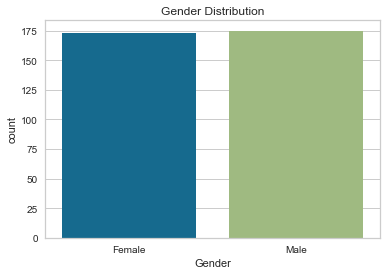

In [46]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Gender')
plt.title("Gender Distribution")
plt.show()

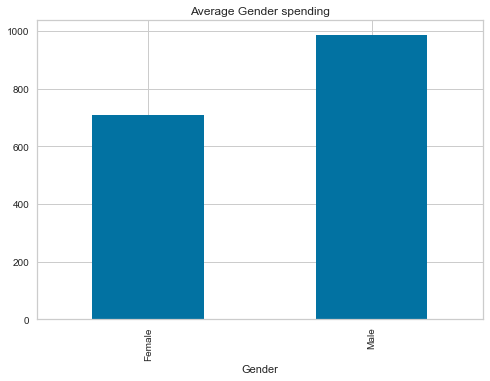

In [47]:
#Relationship between avg spending and gender
gend_spend = data.groupby("Gender")["Total Spend"].mean()
gend_spend.plot.bar()
plt.title("Average Gender spending")
plt.show()

"On average, males tend to spend more and purchase more items compared to females, which could be attributed to the fact that the items in stock may have a more masculine appeal.

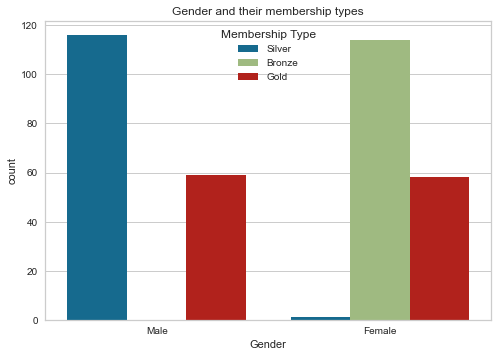

In [48]:
#Visualizing gender and their membership cards

gender_mem = data[["Gender", "Membership Type"]].value_counts().reset_index(name = 'count')
sns.barplot(data = gender_mem, x="Gender", y="count",hue = "Membership Type")
plt.title("Gender and their membership types")
plt.show()

Gold: Typically represents the highest level of loyalty or VIP customers, indicating:
High-value customers with significant purchase history
Frequent buyers or repeat customers
High spending customers

Silver: Represents a mid-tier level of loyalty or customers with moderate purchase history, indicating:
Regular customers with some purchase history
Average spending customers

Customers who have shown some loyalty but not as frequent as gold members
Bronze: Represents a basic level of loyalty or new customers, indicating:
New or infrequent customers
Low spending customers
Customers who have just started engaging with the brand

In [73]:
#Visualize the age group

plt.figure(figsize=(8,6))
age_data = data["Age"].value_counts().reset_index()
sns.barplot(data = age_data, x='Age', y='count')
plt.title("Age Distribution")
plt.show()

TypeError: reset_index() got an unexpected keyword argument 'value'

<Figure size 576x432 with 0 Axes>

The majority of visitors to the e-commerce site fall within the 30 and 32, indicating that this demographic is most actively engaged with the platform.

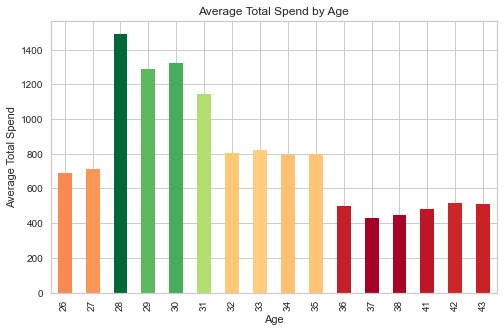

In [50]:
import matplotlib.cm as cm

plt.figure(figsize=(8,5))
age_spend = data.groupby("Age")["Total Spend"].mean()
norm = plt.Normalize(age_spend.min(), age_spend.max())
colors = cm.RdYlGn(norm(age_spend))
age_spend.plot.bar(color=colors)
plt.title("Average Total Spend by Age")
plt.xlabel("Age")
plt.ylabel("Average Total Spend")
plt.show()

"Contrary to expectations, the age group with the highest number of visitors to the site does not necessarily correspond to the highest spending. Interestingly, age 28 emerges as the demographic with the highest spending habits, despite having a relatively lower number of visitors to the site.

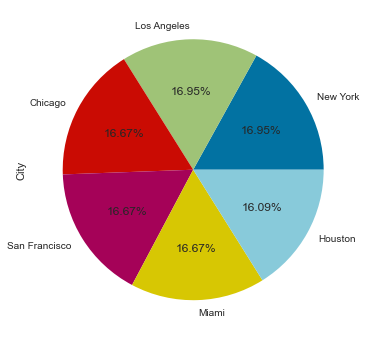

In [51]:
#Visualizing custoemers by cities

plt.figure(figsize=(10,6))
data["City"].value_counts().plot(kind = 'pie', autopct='%.2f%%')
plt.show()
                                   

The pie chart reveals that the majority of customers visiting the e-commerce platform hail from Los Angeles and New York, with these two cities accounting for a significantly larger share of visitors compared to other cities.

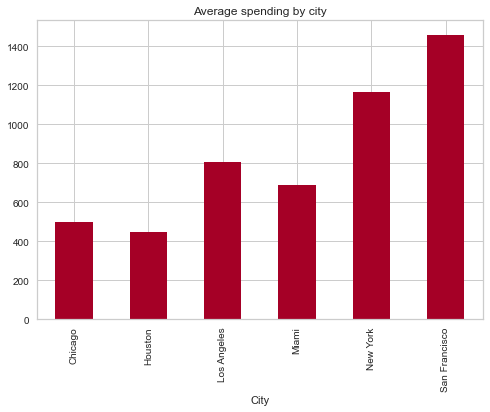

In [52]:
#City total spending

city_spending = data.groupby('City')["Total Spend"].mean()
city_spending.plot.bar(colormap = "RdYlGn")
plt.title("Average spending by city")
plt.show()


"Surprisingly, none of the cities that generate the most traffic to the e-commerce site could be attributed to the highest purchasing power or frequency of purchases. Instead, San Francisco emerges as the city with the highest purchasing power, with its residents making more frequent and higher-value purchases on the platform.

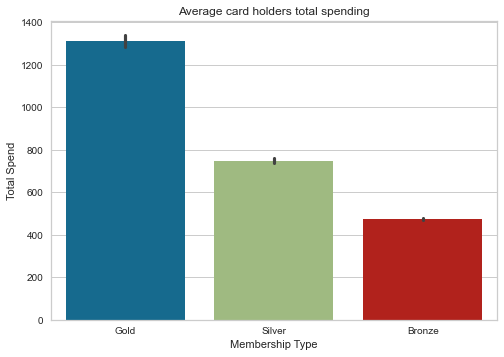

In [16]:
#membership average spending

sns.barplot(data= data, x="Membership Type", y='Total Spend')
plt.title("Average card holders total spending")
plt.show()

Gold: Typically represents the highest level of loyalty or VIP customers, indicating: High-value customers with significant purchase history Frequent buyers or repeat customers High spending customers

Silver: Represents a mid-tier level of loyalty or customers with moderate purchase history, indicating: Regular customers with some purchase history Average spending customers

Customers who have shown some loyalty but not as frequent as gold members Bronze: Represents a basic level of loyalty or new customers, indicating: New or infrequent customers Low spending customers Customers who have just started engaging with the brand

From the plot, its of no doubt Gold card holders will have the highest amount spend

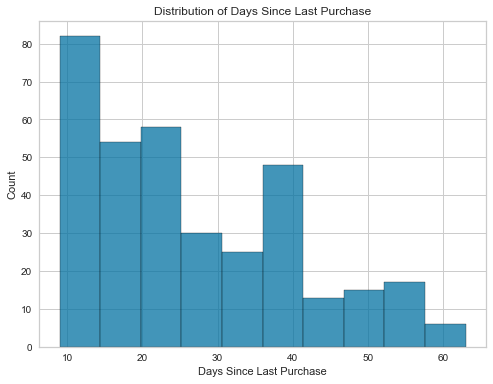

In [17]:
#Distribution of days since last purchase

plt.figure(figsize=(8, 6))
sns.histplot(data['Days Since Last Purchase'])
plt.title("Distribution of Days Since Last Purchase")
plt.show()

This distribution reveals that customers tend to return to the e-commerce platform within a short period, with a peak return time of around 10-15 days. However, the likelihood of customers returning decreases significantly as the time frame extends beyond two months, suggesting that they are less likely to even remember the site.

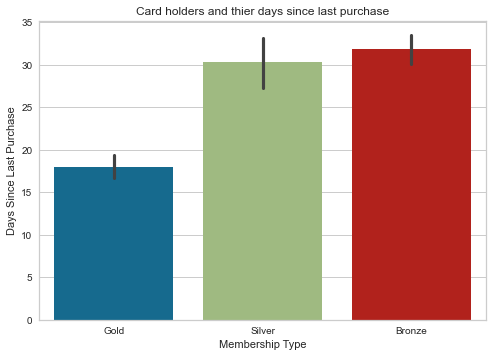

In [18]:
sns.barplot(data= data, x= "Membership Type", y='Days Since Last Purchase')
plt.title('Card holders and thier days since last purchase')
plt.show()

The plot clearly shows that VIP customers exhibit a high likelihood of returning shortly after purchase, with a rapid return rate within a short time frame. In contrast, Bronze card holders demonstrate a significantly lower return rate, indicating a reduced likelihood of repeat business

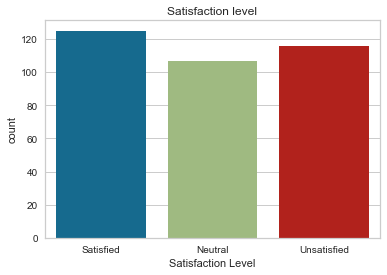

In [19]:
#Showing satisfaction levels

plt.figure(figsize=(6,4))
sns.countplot(data = data, x="Satisfaction Level")
plt.title("Satisfaction level")
plt.show()

While a significant number of customers are satisfied with the services of the e-commerce platform, a substantial count of unsatisfied and neutral customers requires critical attention. It is crucial to investigate the reasons behind customer dissatisfaction and neutrality, and address these issues promptly to enhance overall customer experience and loyalty.

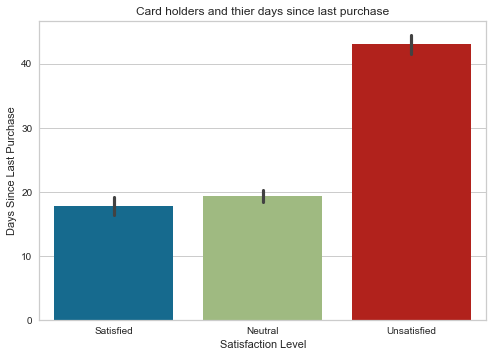

In [20]:
sns.barplot(data= data, x= "Satisfaction Level", y='Days Since Last Purchase')
plt.title('Card holders and thier days since last purchase')
plt.show()

#CLUSTERING

In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns_to_encode = ['Gender', 'City', 'Membership Type', 'Satisfaction Level']

In [60]:
#Using clustering to group customers behavior

# Select relevant features (e.g., purchase history, demographics)
features = ['Gender', 'City', 'Membership Type', 'Satisfaction Level']
# Scale data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

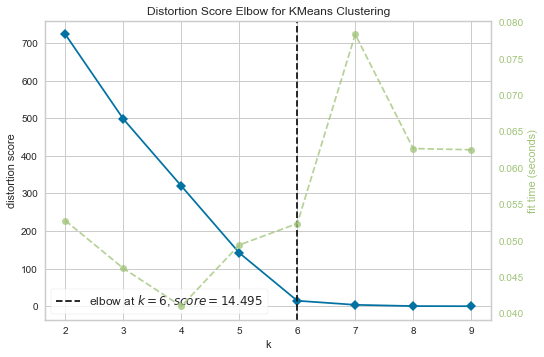

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [61]:
# Use elbow method to determine optimal number of clusters


visualizer = KElbowVisualizer(KMeans(), k=(2, 10))
visualizer.fit(scaled_data)
visualizer.show()

In [62]:
# Perform KMeans clustering with optimal number of clusters
kmeans = KMeans(n_clusters=6)  # Replace with optimal number of clusters
clusters = kmeans.fit_predict(scaled_data)

In [63]:
# Add cluster labels to original data
data['cluster'] = clusters

# Analyze cluster characteristics (e.g., mean purchase amount, demographics)
cluster_stats = data.groupby('cluster').mean()
cluster_stats

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Cluster
cluster,,,,,,,,,,,,
0,275.067797,1.0,29.152542,4.983051,1.000000,1455.549153,19.949153,4.808475,0.016949,11.288136,1.000000,3.966102
1,276.155172,0.0,42.017241,0.000000,0.000000,499.882759,9.413793,3.456897,1.000000,40.465517,2.000000,3.000000
2,279.017857,0.0,36.696429,1.000000,0.000000,447.648214,7.589286,3.191071,0.000000,22.785714,0.000000,0.000000
3,275.105263,1.0,28.947368,3.000000,2.000000,689.687719,11.596491,3.926316,1.000000,45.421053,2.000000,5.000000
4,275.576271,1.0,34.118644,2.000000,2.000000,805.491525,11.677966,4.172881,0.000000,15.271186,0.135593,1.000000
5,274.542373,0.0,30.677966,3.983051,1.016949,1156.896610,15.220339,4.530508,1.000000,25.135593,1.016949,2.050847


In [64]:
from sklearn.metrics import silhouette_score


# Evaluate clustering performance using Silhouette Score
silhouette = silhouette_score(scaled_data, kmeans.labels_)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.9645762096618956


In [65]:
# Analyze cluster characteristics
cluster_data = pd.DataFrame(scaled_data, columns=features)
cluster_data["Cluster"] = kmeans.labels_
print(cluster_data.groupby("Cluster").mean())

           Gender      City  Membership Type  Satisfaction Level
Cluster                                                         
0        0.994269  1.448656        -0.010582           -0.032324
1       -1.005764 -1.472065        -1.238043            1.217543
2       -1.005764 -0.885934        -1.238043           -1.282192
3        0.994269  0.286328         1.216880            1.217543
4        0.994269 -0.299803         1.216880           -1.112718
5       -1.005764  0.862525         0.010223           -0.011140


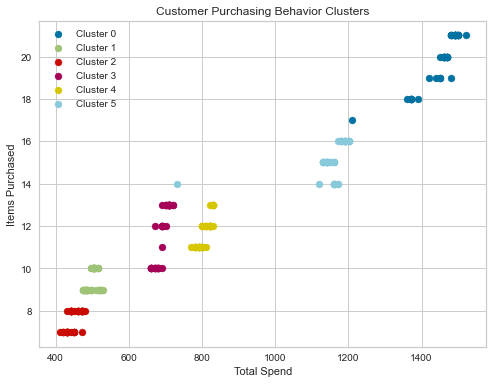

In [66]:
# Assign cluster labels to customers
data["Cluster"] = kmeans.labels_

# Visualize clusters using scatter plot
plt.figure(figsize=(8, 6))
for i in range(6):
    cluster_data = data[data["Cluster"] == i]
    plt.scatter(cluster_data["Total Spend"], cluster_data["Items Purchased"], label=f"Cluster {i}")
plt.xlabel("Total Spend")
plt.ylabel("Items Purchased")
plt.title("Customer Purchasing Behavior Clusters")
plt.legend()
plt.show()


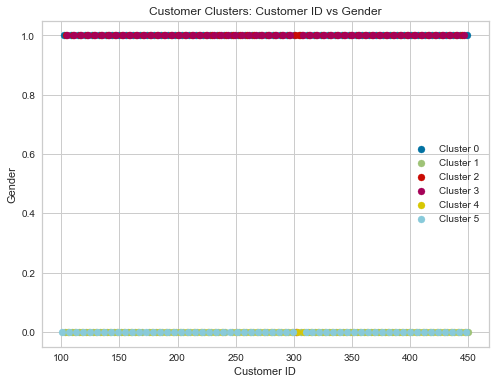

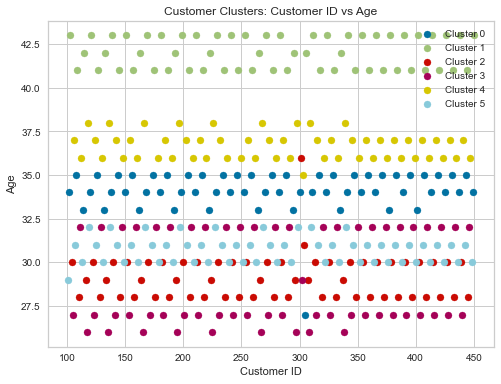

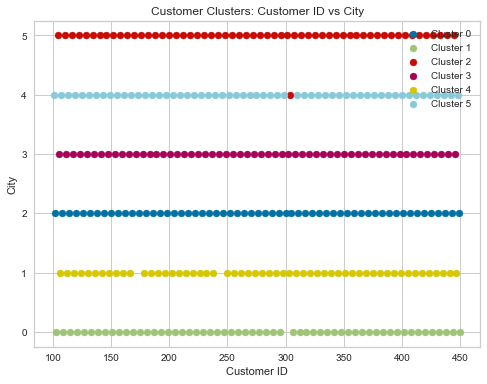

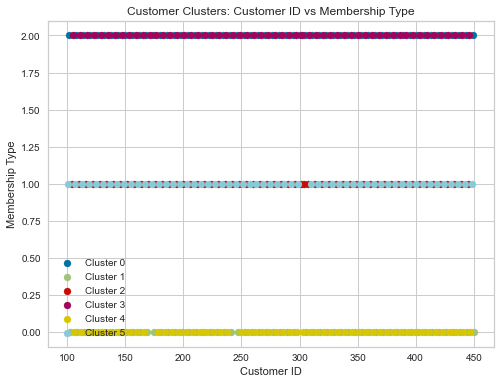

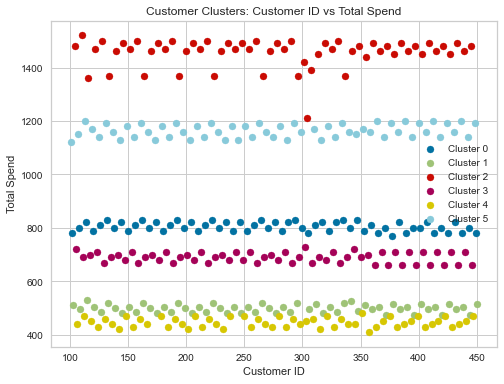

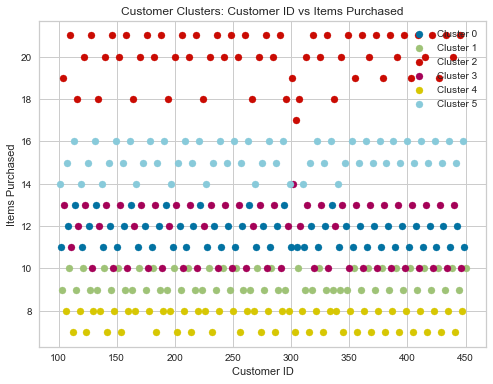

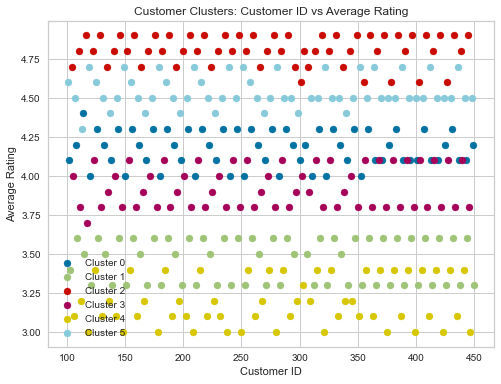

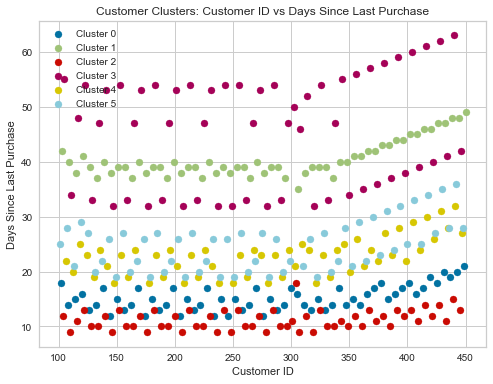

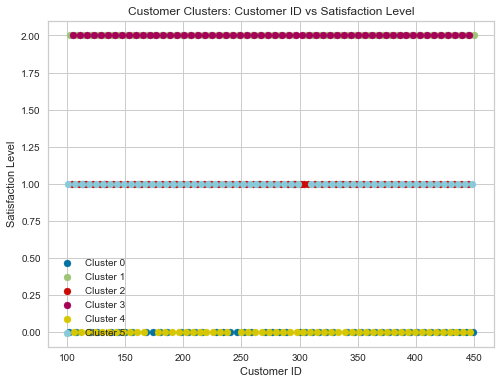

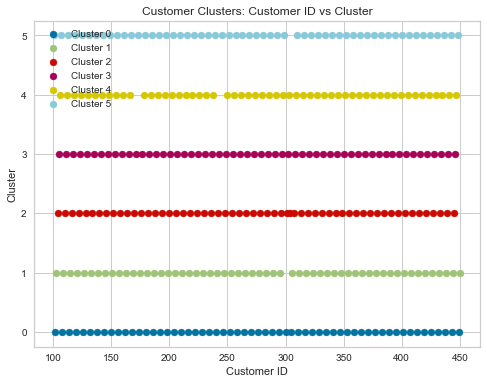

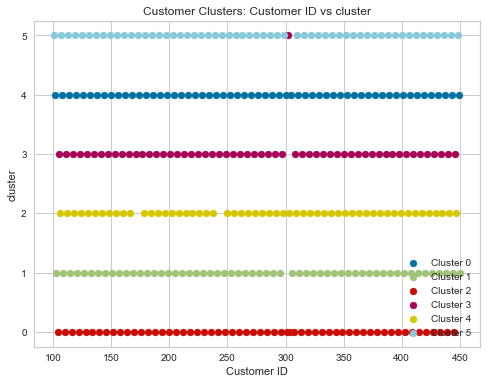

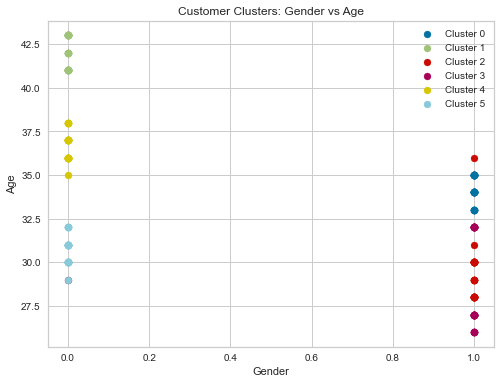

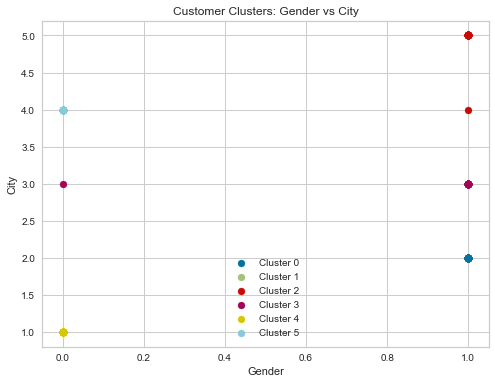

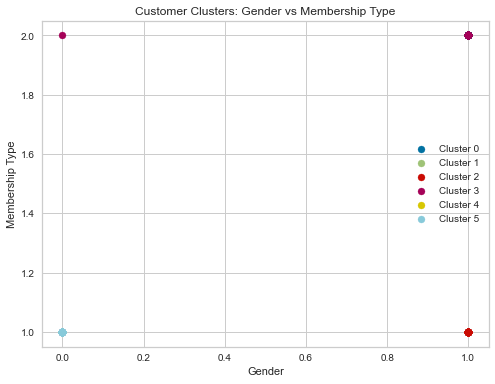

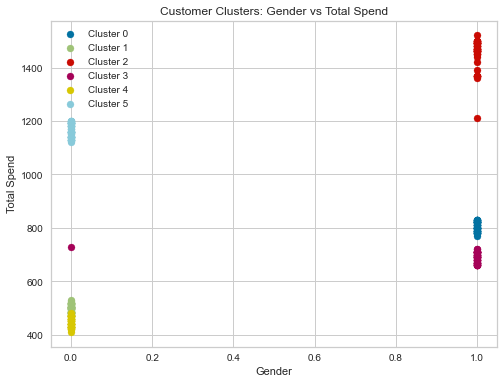

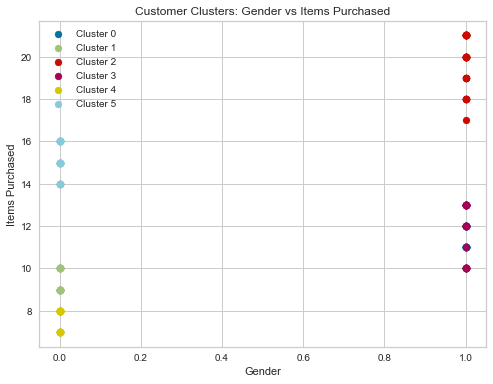

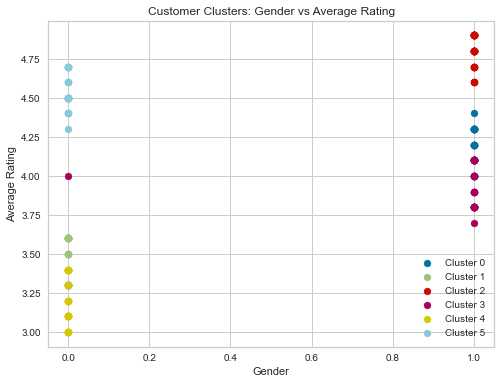

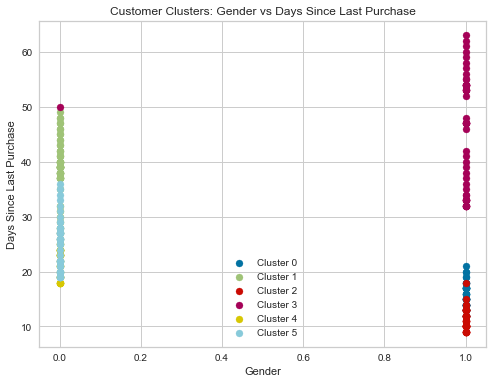

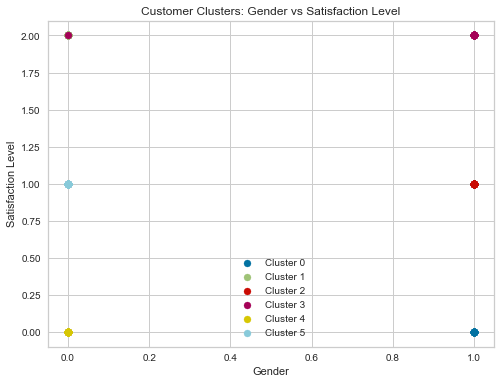

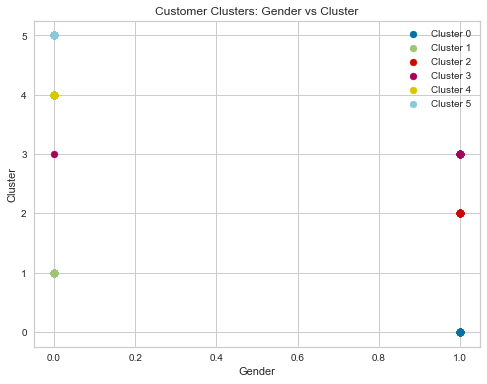

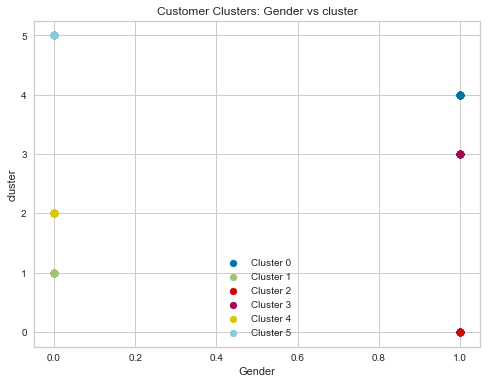

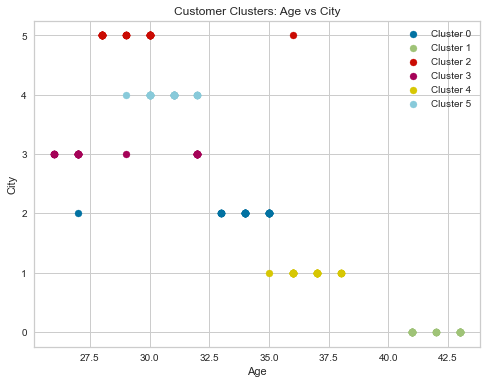

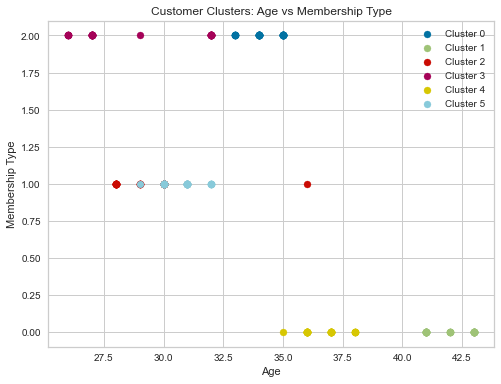

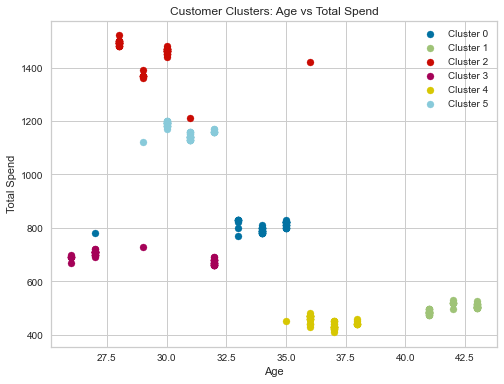

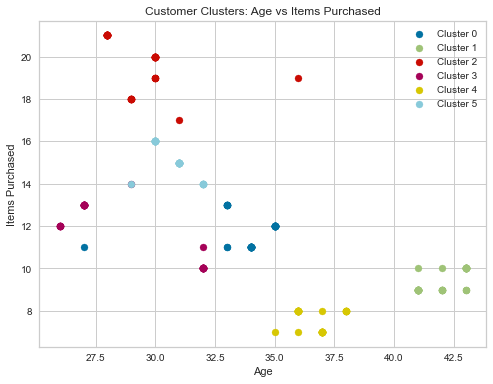

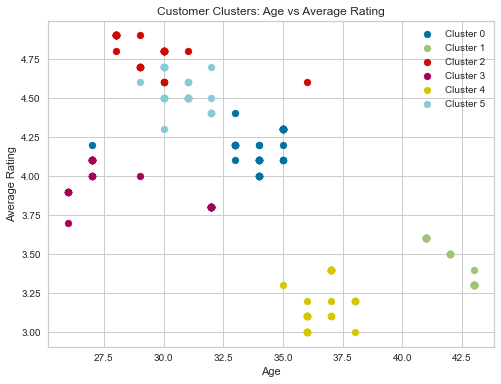

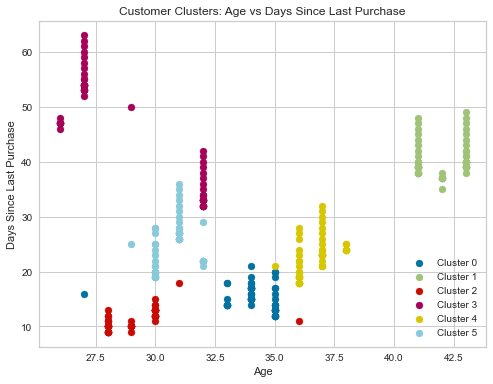

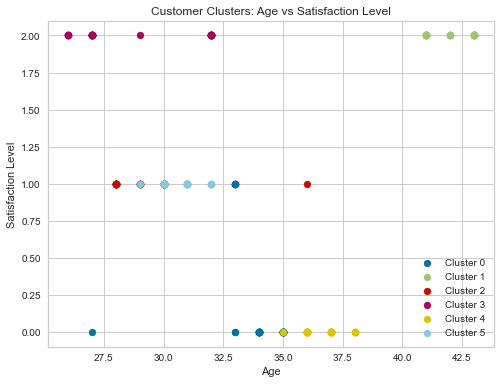

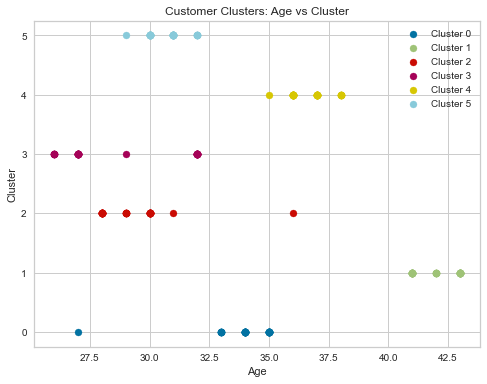

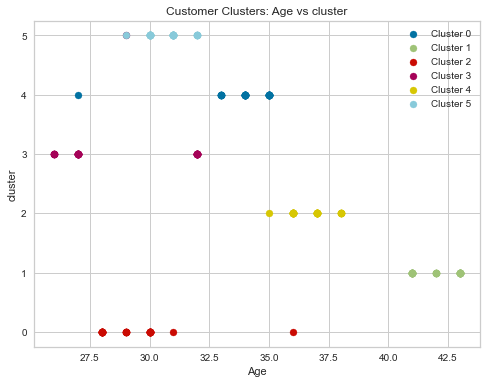

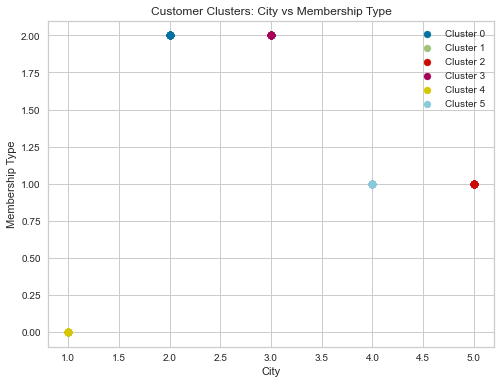

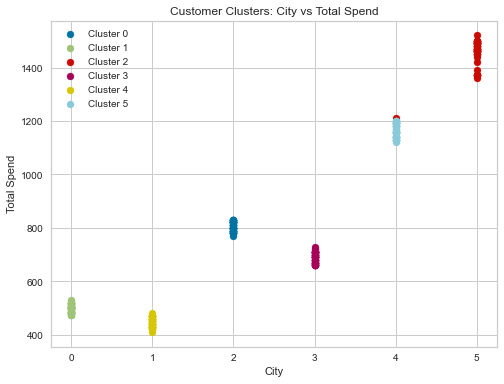

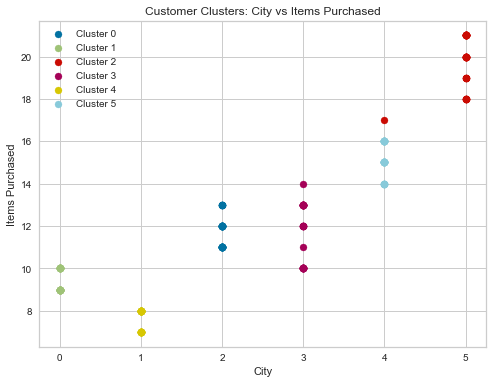

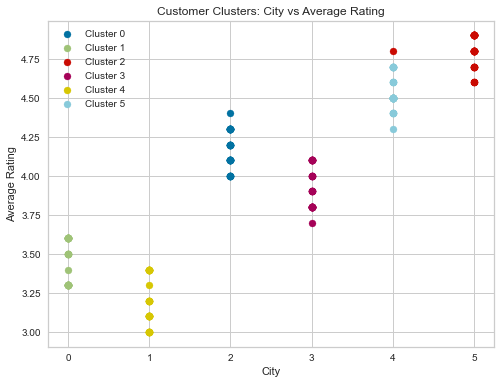

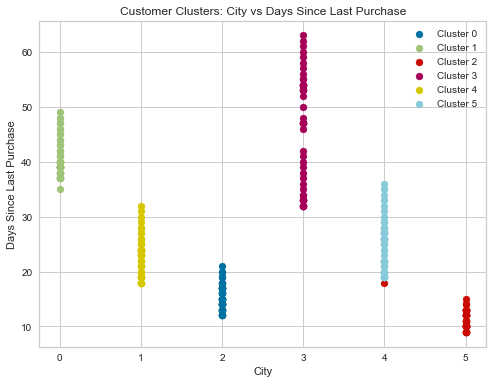

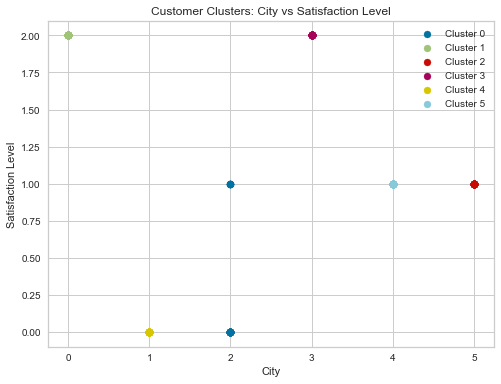

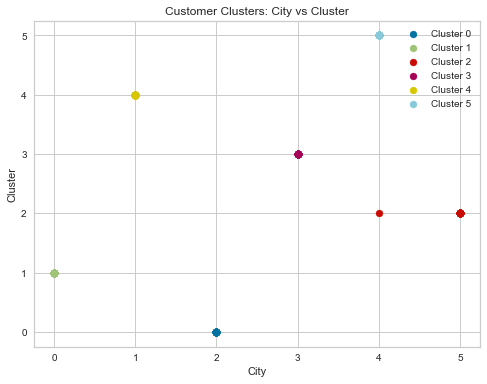

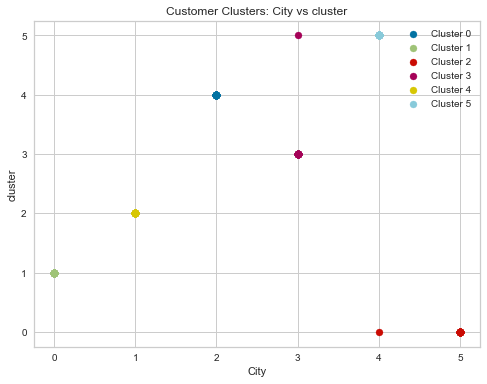

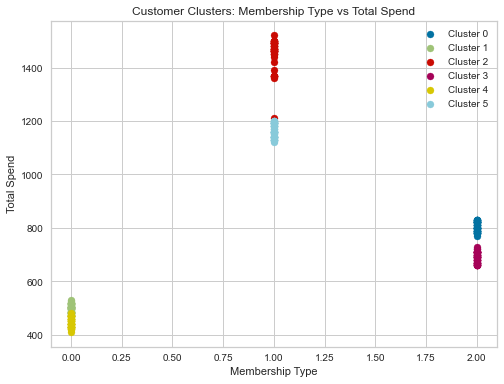

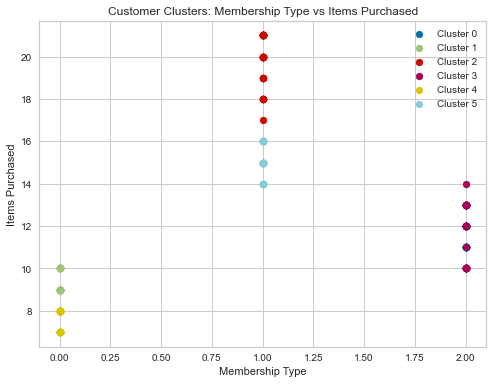

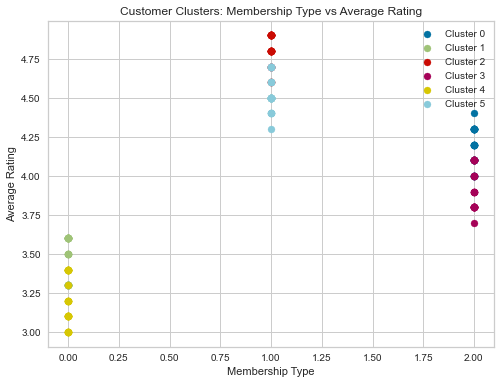

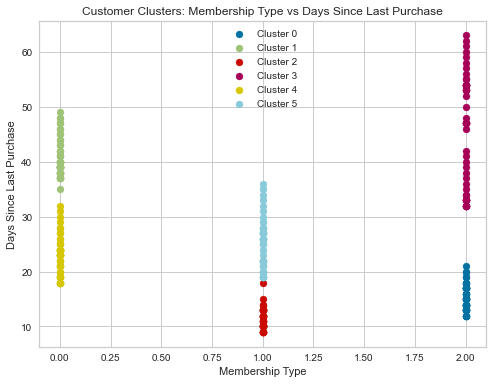

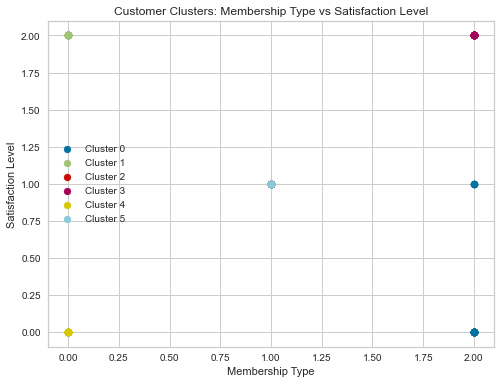

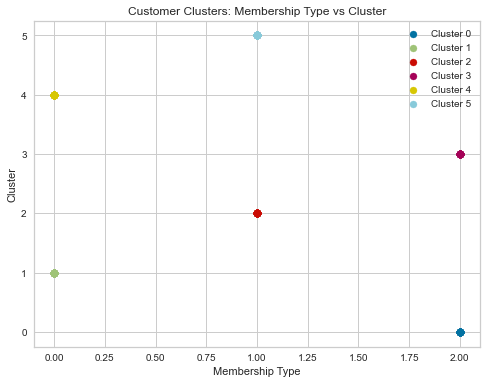

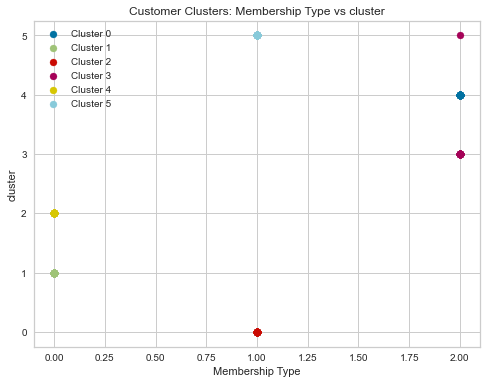

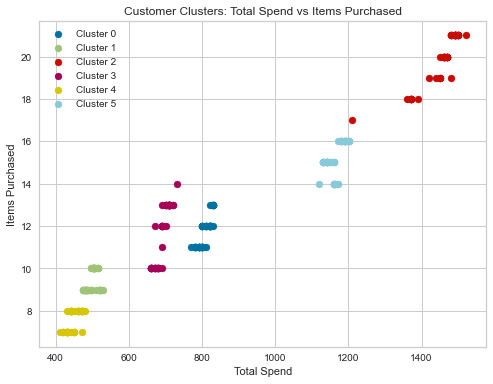

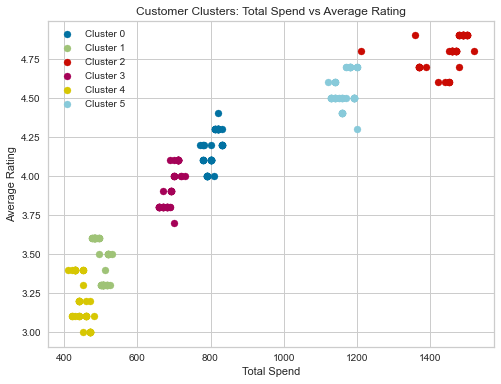

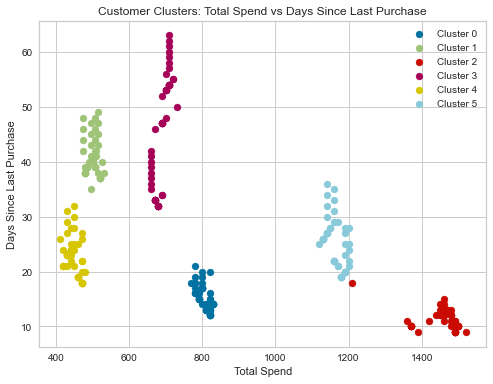

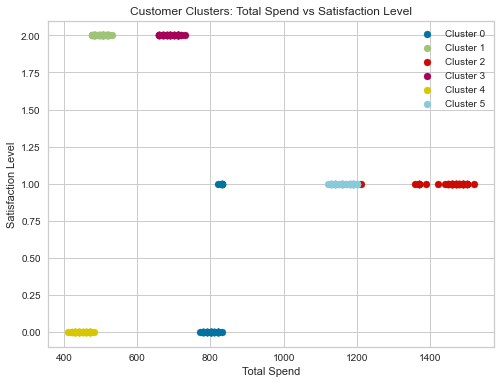

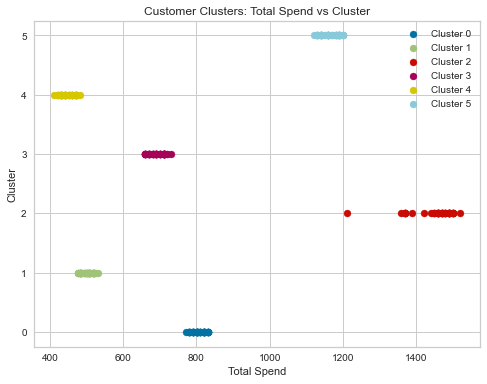

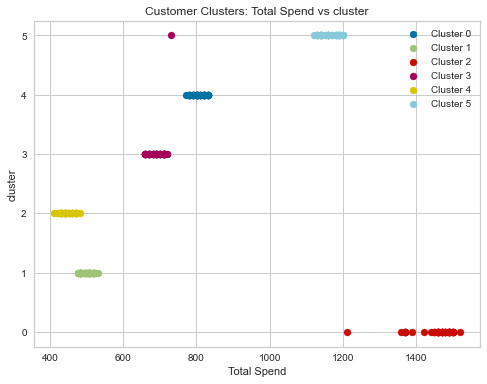

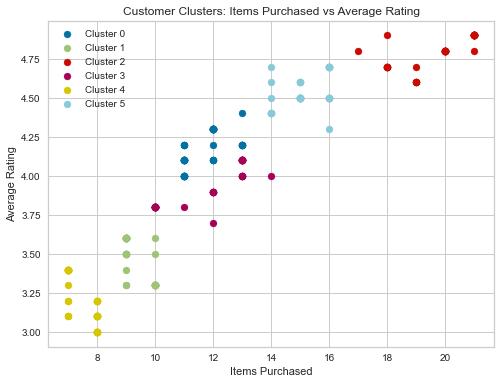

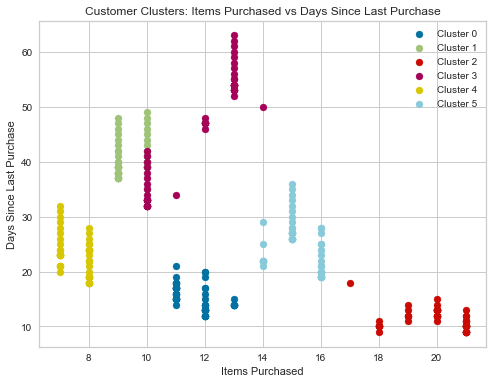

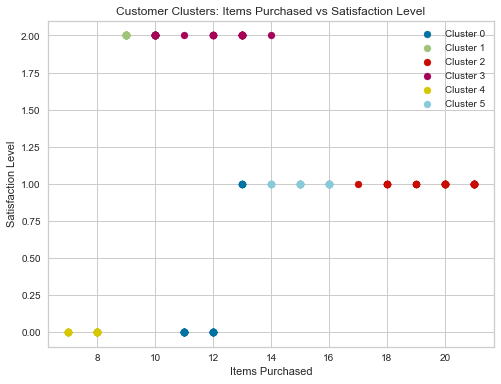

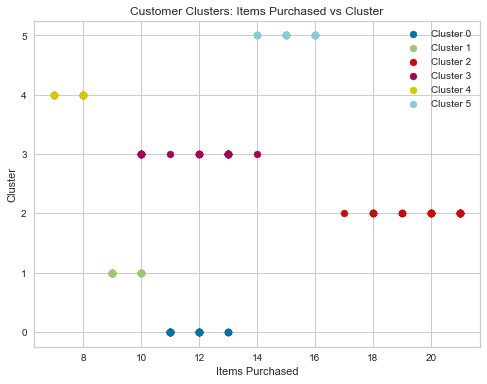

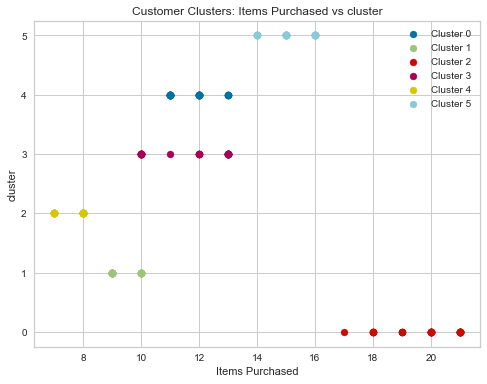

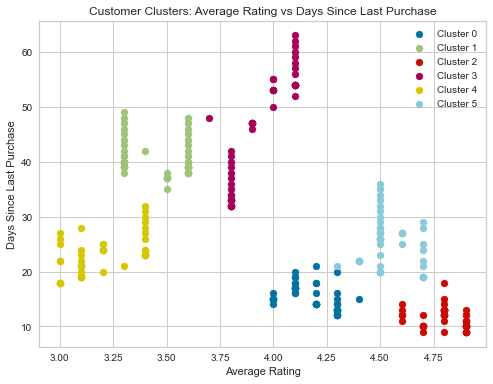

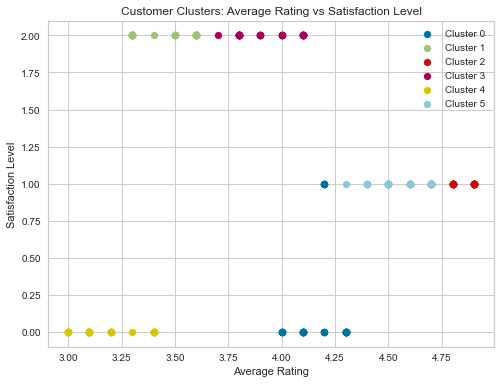

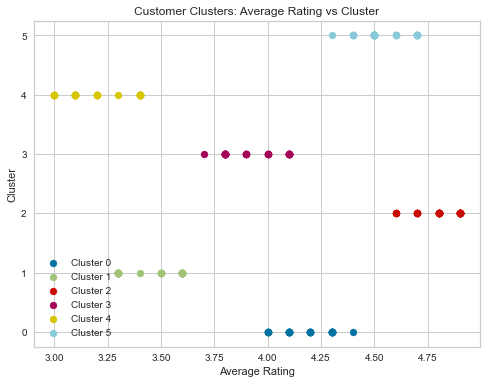

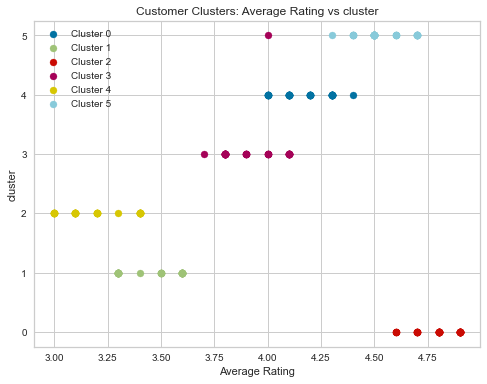

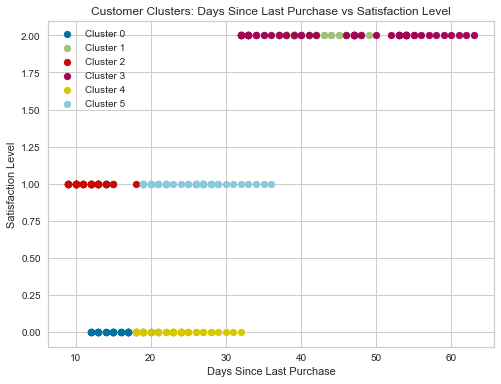

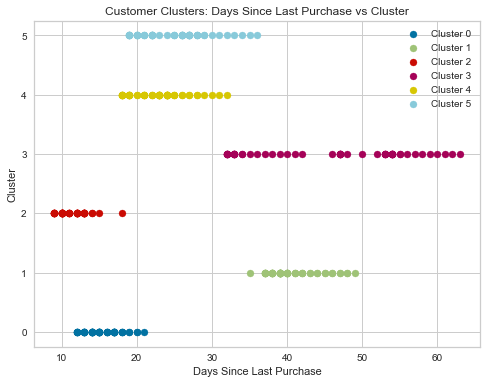

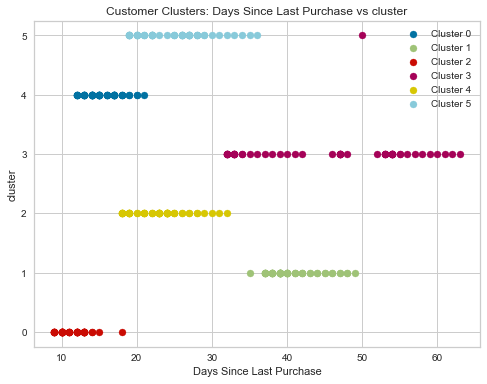

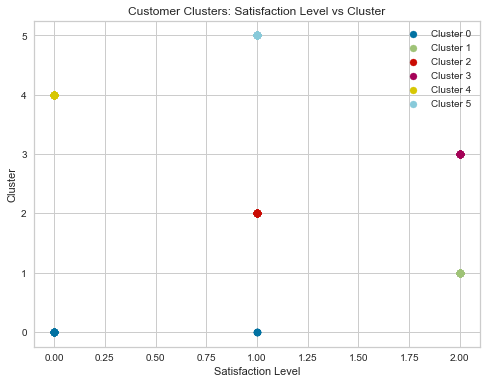

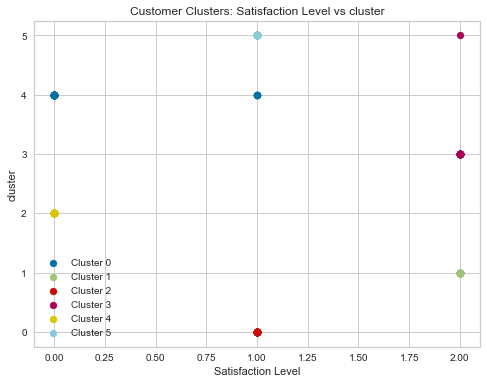

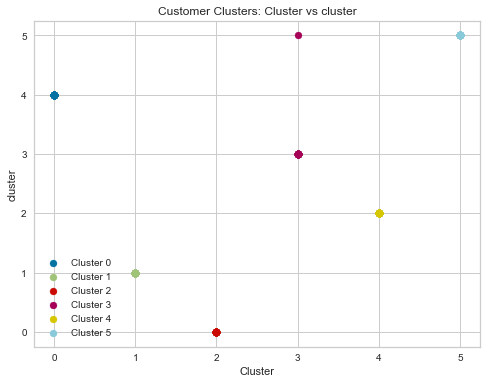

In [67]:



# Identify categorical and numerical columns
categorical_features = data.select_dtypes(include=['object']).columns
numerical_features = data.select_dtypes(include=['number']).columns

# Create preprocessing pipelines for numerical and categorical data
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder())
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Create and apply the preprocessing pipeline
X_preprocessed = preprocessor.fit_transform(data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=6)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(X_preprocessed)
data["Cluster"] = clusters

# Visualize clusters using scatter plot for each pair of features
feature_pairs = list(combinations(numerical_features, 2))

for pair in feature_pairs:
    plt.figure(figsize=(8, 6))
    for i in range(6):
        cluster_data = data[data["Cluster"] == i]
        plt.scatter(cluster_data[pair[0]], cluster_data[pair[1]], label=f"Cluster {i}")
    
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.title(f"Customer Clusters: {pair[0]} vs {pair[1]}")
    plt.legend()
    plt.show()


In [78]:
# Count gender for each cluster
gender_counts = data.groupby(['Cluster', 'Gender']).size().unstack(fill_value=0)
print("Gender counts for each cluster:")
print(gender_counts)

# Count membership type for each cluster
membership_counts = data.groupby(['Cluster', 'Membership Type']).size().unstack(fill_value=0)
print("\nMembership type counts for each cluster:")
print(membership_counts)

# Assuming there is an 'Age' column, categorize age groups
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Count age groups for each cluster
age_group_counts = data.groupby(['Cluster', 'Age Group']).size().unstack(fill_value=0)
print("\nAge group counts for each cluster:")
print(age_group_counts)


Gender counts for each cluster:
Gender    0   1
Cluster        
0        58   0
1        56   0
2         0  59
3         0  59
4         1  57
5        58   0

Membership type counts for each cluster:
Membership Type   0   1   2
Cluster                    
0                 0  58   0
1                56   0   0
2                 0   0  59
3                 0  59   0
4                 0   0  58
5                58   0   0

Age group counts for each cluster:
Age Group  0-18  19-25  26-35  36-45  46-55  56-65  66+
Cluster                                                
0             0      0     58      0      0      0    0
1             0      0      1     55      0      0    0
2             0      0     59      0      0      0    0
3             0      0     58      1      0      0    0
4             0      0     58      0      0      0    0
5             0      0      0     58      0      0    0


In [76]:
# Assuming 'data' is your DataFrame and it contains a 'CustomerID' column and a 'Cluster' column

# Get customer IDs for each cluster
for i in range(6):  # Assuming there are 6 clusters
    cluster_customers = data[data["Cluster"] == i]["Customer ID"]
    print(f"Customers in Cluster {i}:")
    print(cluster_customers.to_list())
    print("\n")


Customers in Cluster 0:
[102, 108, 114, 120, 126, 132, 138, 144, 150, 156, 162, 168, 174, 180, 186, 192, 198, 204, 210, 216, 222, 228, 234, 240, 246, 252, 258, 264, 270, 276, 282, 288, 294, 300, 305, 311, 317, 323, 329, 335, 341, 347, 353, 359, 365, 371, 377, 383, 389, 395, 401, 407, 413, 419, 425, 431, 437, 443, 449]


Customers in Cluster 1:
[103, 109, 115, 121, 127, 133, 139, 145, 151, 157, 163, 169, 175, 181, 187, 193, 199, 205, 211, 217, 223, 229, 235, 241, 247, 253, 259, 265, 271, 277, 283, 289, 295, 306, 312, 318, 324, 330, 336, 342, 348, 354, 360, 366, 372, 378, 384, 390, 396, 402, 408, 414, 420, 426, 432, 438, 444, 450]


Customers in Cluster 2:
[104, 110, 116, 122, 128, 134, 140, 146, 152, 158, 164, 170, 176, 182, 188, 194, 200, 206, 212, 218, 224, 230, 236, 242, 248, 254, 260, 266, 272, 278, 284, 290, 296, 301, 304, 307, 313, 319, 325, 331, 337, 343, 349, 355, 361, 367, 373, 379, 385, 391, 397, 403, 409, 415, 421, 427, 433, 439, 445]


Customers in Cluster 3:
[105, 111, 117,

****PREDICTION MODELING****

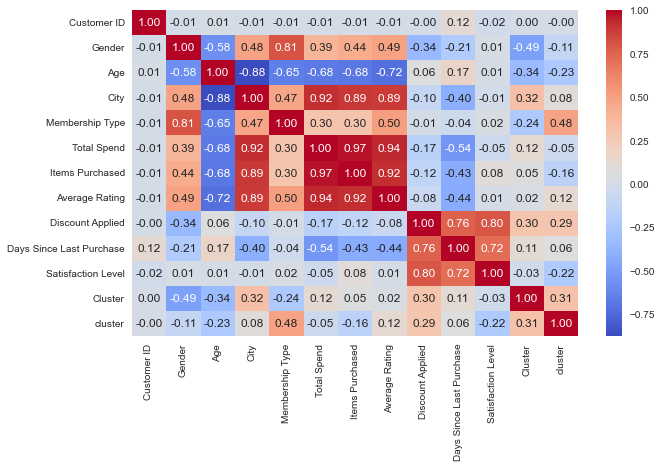

In [68]:


for column in columns_to_encode:
    data[column] = le.fit_transform(data[column])
plt.figure(figsize=(10,6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix,  annot=True, cmap='coolwarm', fmt=".2f")
plt.show()
            

Some of th

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [70]:
#selecting featured and targeted variables

features = ["Gender", "Age", "City", "Membership Type", "Satisfaction Level"]
target = ["Days Since Last Purchase"]

X = data[features]
y = data[target]

#spliting the data into training and testing

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

#Model Initialization
model = LinearRegression()

#fit or train the model
model.fit(X_train,y_train)

LinearRegression()

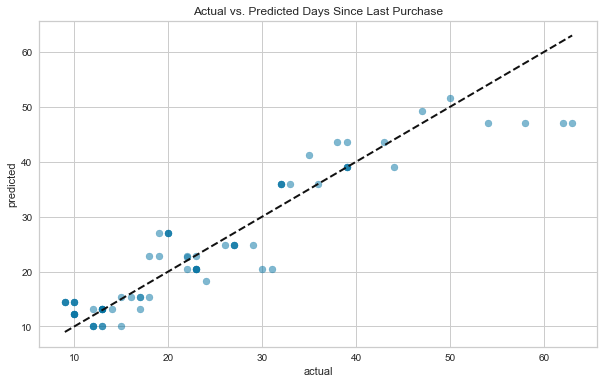

In [71]:
#Visualizing the actual versus predicted to access how well our model is peforming

#making prediction using the linear regression model
y_pred = model.predict(X_test)

#visualizing: actual vs predicted

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max() ], "k--", lw=2)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title('Actual vs. Predicted Days Since Last Purchase')
plt.show()

****Understanding the gap between actual and predicted days since the last purchase helps identify customers who are likely to return soon****

For customers with underestimated days since last purchase, targeted promotions can be sent to encourage repeat business.

For customers with overestimated days, the business can avoid excessive marketing to prevent annoyance.

By considering the predicted time until the next purchase, the business can calculate the expected revenue from each customer over their lifetime.

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Mean Absolute Error: 3.529398500936772
Mean Squared Error: 23.160231178364608
Root Mean Squared Error: 4.812507784758858
R-squared: 0.8742011750440225


The low MAE and RMSE indicate that the model’s predictions are relatively close to the actual values.

The R-squared value of 0.87 suggests that around 87% of the variability in the days since the last purchase can be explained by the features used in the model.